## Library

In [ ]:
# https://www.kaggle.com/code/sandeepbhogaraju/text-summarization-with-seq2seq-model/notebook
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import time
import json
from konlpy.tag import Okt
import re
import spacy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import defaultdict

In [ ]:
!python -m spacy download ko_core_news_sm

In [2]:
#HYPER PARAMETER
DATA_PATH = './data.json'

In [3]:
# data loading
def loadData():
    with open(DATA_PATH, "r") as f:
        data = json.load(f)
    title = []
    content = []
    for i in data:
        title.append(i["title"])
        content.append(i["content"])
    return title, content

In [4]:
title, content = loadData()

In [5]:
# tokenizer, tagging, lemmatizer, textCategorizer
from time import time

nlp = spacy.load("ko_core_news_sm", disable=['ner', 'parser'])

t = time()

text = []

for c in content:
    txt = ''
    for doc in nlp.pipe(c, batch_size=100):
        txt+=str(doc)
    text.append(txt)

# text = [str(doc) for doc in nlp.pipe(c, batch_size=5000) for c in content]

print(round(time()-t/60, 2))

1626109904.14


In [6]:
text

['이번 조사는 지난해 10월 15일~24일까지 서비스센터 업체를 이용한 성인 1268명을 대상으로 온라인설문 방식으로 진행됐다.서비스 품질·상품·호감도 3개 부문을 총체적으로 평가한 종합만족도는 국산차 서비스센터가 평균 3.60점, 수입차 서비스센터가 평균 3.54점이었다.세부 항목 평가 결과를 살펴보면 서비스센터 서비스의 일관성, 전문성, 고객 대응 등 \'서비스 품질\'에 대한 만족도는 국산차 서비스센터의 경우 평균 3.77점이었다.수입차 서비스센터는 평균 3.72점으로, 렉서스 3.93점, 메르세데스 벤츠 3.86점, 포드 3.80점 등의 순이었다.\'서비스 상품 만족도\'는 시설 이용 편리성, 점검절차 및 비용의 적절성, 사이트·앱 정보유용성 3개 요인으로 평가했는데, 국산·수입차 서비스센터 모두 시설 이용 편리성 만족도가 각각 3.71점과 3.88점으로 높은 반면, 사이트·앱 정보유용성 만족도는 3.29점으로 낮았다.국산차 서비스센터의 경우 르노삼성이 모든 요인에서 만족도가 상대적으로 높았고, 수입차 서비스센터는 렉서스가 점검절차 및 비용의 적절성에서, 벤츠가 시설 이용 편리성에서 만족도가 상대적으로 높았다.소비자가 서비스를 체험하면서 느낀 주관적 감정을 평가한 \'서비스 호감도\'는 국산차 서비스센터의 경우 르노삼성 3.69점, 쌍용자동차 3.62점 등의 순이었다.한편 피해구제 합의율은 BMW와 벤츠가 상대적으로 높았다.지난 2015년부터 최근 3년간 소비자원에 접수된 11개 자동차 서비스센터 관련 피해구제 신청건수는 총 916건으로 집계됐다.등록대수 10만 대당 건수는 현대자동차가 1.4건으로 가장 적었고 다음으로 렉서스, 기아자동차 등의 순이었다.피해구제 접수사건 중 환급, 배상, 계약해제 등 보상 처리된 사건의 비율(합의율)은 BMW와 벤츠가 각각 66.7%, 57.8%인데 비해 아우디(38.2%), 쌍용자동차(49.0%)의 합의율은 상대적으로 낮게 나타났다.소비자원 관계자는 "이번 조사 결과를 관련 사업자와 공유하고 취약부문에 대한 개선을 

In [7]:
t = time()

target = []

for doc in nlp.pipe(title, batch_size=100):
    target.append("_START_" + str(doc) + "_END_")
        
print(type(t))

<class 'float'>


In [8]:
target

['_START_자동차 서비스센터, 르노삼성·렉서스 종합만족도 1위_END_',
 '_START_야당 ‘김태우·신재민 협공‘, 여당 "수용불가"_END_',
 '_START_인천뮤지엄파크 ‘속 빈 강정’ 될 판_END_',
 '_START_정읍시, 영세소상공인 특례보증 지원 업무협약 체결_END_',
 '_START_칠성24지구 시공사 선정과정 두고 또 잡음_END_',
 "_START_뮤지컬 '루드윅 베토벤 더 피아노', 청년 역 이용규-강찬-박준휘-조환지 캐릭터 컨셉컷 공개!_END_",
 '_START_공주시 "공주보 기능 유지해달라" 정부에 건의_END_',
 '_START_공주시, ‘클린 하늘 만들기’ 팔 걷었다_END_',
 '_START_국토부, 화재 취약 건물 성능 보강 지원_END_',
 "_START_'이마트 노브랜드' 군포 산본역 진출... 상인들 반발_END_",
 '_START_서울반도체 "원자력안전위원회, 추가 정밀검사 결과 협력사 2명 모두 정상"_END_',
 '_START_한국헬스커뮤니케이션학회, 금연 캠페인 주제로 특별 세미나 개최_END_',
 "_START_'렛잇고' 다시 찾아온 '겨울왕국' 광주서도 인기_END_",
 "_START_'라디오스타' 피오, 블락비 소속사서 독립한 '지코 저격설' 언급_END_",
 '_START_PK 정치권 ‘총선 불출마 선언’ 얼마나 할까_END_',
 '_START_11번가 ‘로드샵’서비스, 1년새 입점상점·매출 모두 2배로_END_',
 '_START_“동계체전 효자 종목으로 키운 부산스키에 관심을”_END_',
 '_START_작년 장기실업자 외환위기 이후 ‘최다’_END_',
 '_START_전남도, 여수산단 투자 촉진·기반 확충 모색_END_',
 '_START_괴산군, 곤충시장 선점에 두 팔 걷어_END_',
 '_START_“뿌리산업 중기 2020년까지 정기세무조사 제외 검토”_END_',
 '_START_道, 여성 농어업인 행복바우처 확대_END_',
 '_START_‘슈퍼맨이

In [9]:
pre = pd.DataFrame()

In [10]:
pre['cleaned_text'] = pd.Series(text)
pre['cleaned_summary'] = pd.Series(target)

In [11]:
pre['cleaned_summary']

0               _START_자동차 서비스센터, 르노삼성·렉서스 종합만족도 1위_END_
1                 _START_야당 ‘김태우·신재민 협공‘, 여당 "수용불가"_END_
2                       _START_인천뮤지엄파크 ‘속 빈 강정’ 될 판_END_
3                _START_정읍시, 영세소상공인 특례보증 지원 업무협약 체결_END_
4                    _START_칠성24지구 시공사 선정과정 두고 또 잡음_END_
                             ...                        
225                      _START_국립공주박물관 '가족문화축제' 개최_END_
226                     _START_KBS 출신 전·현직 靑 대변인 설전_END_
227       _START_SKT, 한·아세안서 첨단 미디어 기술로 ‘성덕대왕신종’ 복원_END_
228    _START_“옷 주문 했는데 못 받고, 환불도 못 받고...” 두 번 우는 소비자...
229                        _START_평화당 '제3지대론' 연일 군불_END_
Name: cleaned_summary, Length: 230, dtype: object

In [12]:
pre['cleaned_text']

0      이번 조사는 지난해 10월 15일~24일까지 서비스센터 업체를 이용한 성인 1268...
1      회동이 끝난 후 야당 원내대표들은 김태우 특검법 도입과 신재민 전 사무관의 폭로를 ...
2      수천억 원을 들여 조성하게 될 인천뮤지엄파크가 자칫 속 빈 강정이 될 수 있다는 우...
3      주요 변경 내용은 가산금리 인하(은행별 상이)와 상환방식 변경, 금융기관(국민은행)...
4      각종 논란들이 불식되지 않은 상황에서 조합 내 갈등이 깊어지면서 일부 조합원 측은 ...
                             ...                        
225    8일 동안 진행되는 이번 가족문화축제는 실내공연을 비롯하여 체험프로그램, 공예프로그...
226    자유한국당 원내 대변인을 맡고 있는 민 의원은 이날 자신의 페이스북 계정에 올린 글...
227    '바른 울림이 있는 곳'이라는 뜻의 선향정은 아세안 국가의 평화와 번영을 상징하는 ...
228    1일 익명의 제보자에 따르면 최근 제보자의 어머니가 카카오스토리를 통해 해당 업체에...
229    공동교섭단체 구성의 경우 유 원내대표가 ‘결코 가서는 안될 길’이라며 반대 입장을 ...
Name: cleaned_text, Length: 230, dtype: object

In [13]:
len(title)

230

In [14]:
text_count = []
summary_count = []

In [15]:
for sent in pre['cleaned_text']:
    text_count.append(len(sent.split()))
for sent in pre['cleaned_summary']:
    summary_count.append(len(sent.split()))

In [16]:
graph_df= pd.DataFrame()
graph_df['text']=text_count
graph_df['summary']=summary_count

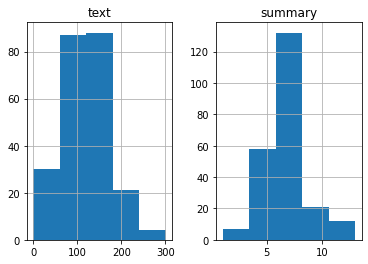

In [17]:
graph_df.hist(bins = 5)
plt.show()

In [18]:
#Check how much % of summary have 0-15 words
cnt=0
for i in pre['cleaned_summary']:
    if(len(i.split())<=15):
        cnt=cnt+1
print(cnt/len(pre['cleaned_summary']))

1.0


In [19]:
#Check how much % of text have 0-70 words
cnt=0
for i in pre['cleaned_text']:
    if(len(i.split())<=100):
        cnt=cnt+1
print(cnt/len(pre['cleaned_text']))

0.4


In [20]:
#Model to summarize the text between 0-15 words for Summary and 0-100 words for Text
max_text_len=300
max_summary_len=15

In [21]:
#Select the Summaries and Text between max len defined above

cleaned_text =np.array(pre['cleaned_text'])
cleaned_summary=np.array(pre['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre=pd.DataFrame({'text':short_text,'summary':short_summary})

In [22]:
post_pre['summary'] = post_pre['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [23]:
post_pre.head(2)

,text,summary
0,이번 조사는 지난해 10월 15일~24일까지 서비스센터 업체를 이용한 성인 1268...,"sostok _START_자동차 서비스센터, 르노삼성·렉서스 종합만족도 1위_END..."
1,회동이 끝난 후 야당 원내대표들은 김태우 특검법 도입과 신재민 전 사무관의 폭로를 ...,"sostok _START_야당 ‘김태우·신재민 협공‘, 여당 ""수용불가""_END_ ..."


In [24]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(post_pre['text']),np.array(post_pre['summary']),test_size=0.1,random_state=0,shuffle=True)

In [25]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [26]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 93.76503608660785
Total Coverage of rare words: 65.56840077071291


In [27]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 934


In [28]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [29]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 99.53161592505855
Total Coverage of rare words: 62.0658547586829


In [30]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 7


In [31]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [32]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [33]:
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

print("Size of vocabulary from the w2v model = {}".format(x_voc))

K.clear_session()

latent_dim = 230
embedding_dim=200

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

C:\Users\khyog\anaconda3\envs\newLab\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Size of vocabulary from the w2v model = 934
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 300, 200)     186800      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 300, 230), ( 396520      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________

In [34]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [35]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [ ]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=230, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/50


In [ ]:
content[0]